                              review_id  \
0  b1e35bc0-0fa3-4e11-819d-10fd955c7546   
1  a8141b04-6c42-4851-b56e-99a04376f817   
2  80f9b9d0-3ca1-4013-b0c0-30833ba19c79   
3  2b1f2895-7a32-45f7-b725-d669a189c448   
4  e8634ccd-9f61-4d18-8d37-6aa2d01b1a00   

                                    review_text      brand product  \
0          Highly recommend. Packaging was okay  Gadgetron   Phone   
1                    Love it. Delivery was fast   NovaTech   Phone   
2             Works flawlessly. Could be better  SmartWare  Camera   
3     Great value for money. Packaging was okay    TechPro  Tablet   
4  Highly recommend. Still testing the features  SmartWare   Phone   

         date sentiment  user_verified  rating  
0  2022-12-22  Positive           True       5  
1  2021-12-28  Positive          False       5  
2  2021-07-13  Positive           True       4  
3  2022-09-16  Positive           True       5  
4  2022-06-09  Positive           True       4  


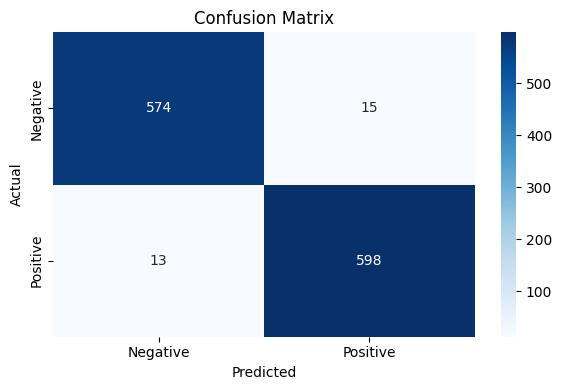

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       589
           1       0.98      0.98      0.98       611

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



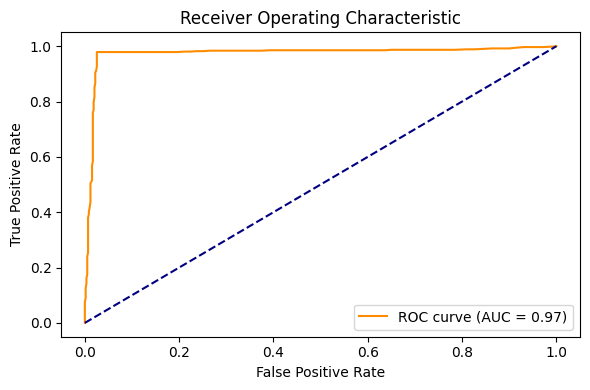

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("realistic_high_accuracy_sentiment_dataset.csv")  # Replace with actual file path if needed

# Check structure
print(df.head())

# Convert sentiment to binary (Positive=1, Negative=0)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Feature and Target
X = df['review_text']
y = df['sentiment']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_vect = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Precision and Recall
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
